# Imports

In [24]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd

# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md

#from statsmodels.tsa.stattools import adfuller

import itertools



# Load Dataframe

In [92]:
Occurence_df = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/Combined_Dataframe_02032022.csv") 

Occurence_df = set_correct_datatypes(Occurence_df)


# Set correct datatypes

In [93]:
def set_correct_datatypes(dataframe):
    dataframe.KeyWord.astype(str)
    dataframe["date"] = pd.to_datetime(dataframe["date"], format='%Y-%m-%d')
    return dataframe


# Helper

In [75]:
def saveCSV(dataframe, filename):
    dataframe.to_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/"+ filename +".csv",index=False)


# Visuals

In [7]:
def plot_Occurence_over_time_linegraph(i_dataframe_o, KeyWord, Occurence_Columns, figsize):
    # copy inputs
    dataframe = i_dataframe_o.copy()
    Occurence_Columns_copy = Occurence_Columns.copy()
    # get all rows by keyword
    dataframe = dataframe.loc[(dataframe["KeyWord"] == KeyWord)]
    Occurence_Columns.extend(["date","KeyWord"])
    dataframe = dataframe[Occurence_Columns]
    dataframe = dataframe.set_index("date")
    
    
    
    fig, ax = plt.subplots(figsize = (15, 7))

    sns.lineplot(ax = ax, data=dataframe).set_title('Occurence over time: ' + KeyWord)

    plt.xlabel('Date')
    plt.ylabel('Occurence')
    
    
    column_1 = dataframe["normalized_Occurence_in_News"]
    for Occurence_Column in Occurence_Columns_copy:
        column_2 = dataframe[Occurence_Column]
        correlation = column_1.corr(column_2)
        print("Correlation between news and "+ Occurence_Column +" is: "+ str(correlation))
                
    return dataframe

def plot_Occurece_over_time_heatmap(i_dataframe_o,KeyWord,Occurence_Columns):
    # copy inputs
    dataframe = i_dataframe_o.copy()
    Occurence_Columns_copy = Occurence_Columns.copy()
    # get all rows by keyword
    dataframe = dataframe.loc[(dataframe["KeyWord"] == KeyWord)]
    Occurence_Columns.extend(["date","KeyWord"])
    dataframe = dataframe[Occurence_Columns]
    #dataframe = dataframe.set_index("date")
    
    return dataframe
    #sns.heatmap(dataframe, robust=True, cmap='YlGnBu', yticklabels=False, xticklabels=5, cbar=False)




def check_granger_causality(i_dataframe_o, KeyWord, Columns):
    dataframe = i_dataframe_o.loc[(i_dataframe_o["KeyWord"] == KeyWord)]

    # check for stationary
    for Column in Columns:        
        result = adfuller(dataframe[Column])
        print(f'Column: ' + Column)
        print(f'Test Statistics: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'critical_values: {result[4]}')
        
        if result[1] > 0.05:
            print("Series is not stationary")
            df_transformed = dataframe.diff()
            
        else:
            print("Series is stationary")
        print()

Correlation between news and normalized_Occurence_in_News is: 1.0
Correlation between news and Occurence_in_Google_normalized is: 0.9017895815130134
Correlation between news and normalized_Occurence_in_Wikipedia is: 0.9457086624397183


,normalized_Occurence_in_News,Occurence_in_Google_normalized,normalized_Occurence_in_Wikipedia
count,114.000000,114.000000,114.000000
mean,0.041508,0.038947,0.046235
std,0.120580,0.140469,0.131566
min,0.000000,0.000000,0.003216
25%,0.000000,0.000000,0.005429
50%,0.007246,0.000000,0.008165
75%,0.028986,0.020000,0.020928
max,1.000000,1.000000,1.000000


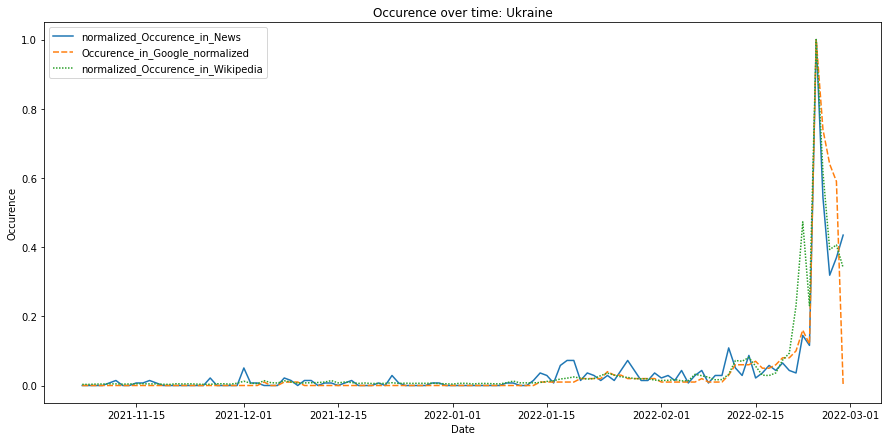

In [19]:
normalized_data = ["normalized_Occurence_in_News","Occurence_in_Google_normalized","normalized_Occurence_in_Wikipedia"]
x = plot_Occurence_over_time_linegraph(Occurence_df,"Ukraine", normalized_data,(20,8))
x.describe()

# Create correlation dataframe

In [99]:
normalized_data = ["normalized_Occurence_in_News","Occurence_in_Google_normalized","normalized_Occurence_in_Wikipedia"]

def calculate_correlation(dataframe):  
    decimals = 2
    
    News = dataframe["normalized_Occurence_in_News"]
    Google = dataframe["Occurence_in_Google_normalized"]
    Wikipedia = dataframe["normalized_Occurence_in_Wikipedia"]
    dataframe["correlation_news_google"] = round(News.corr(Google) , decimals)
    dataframe["correlation_news_wikipedia"] = round(News.corr(Wikipedia), decimals)
    dataframe["correlation_google_wikipedia"] = round(Google.corr(Wikipedia), decimals)
    
    
    return dataframe

Correlation_DataFrame = Occurence_df.groupby("KeyWord").apply(calculate_correlation)
Correlation_DataFrame = Correlation_DataFrame.sort_values("correlation_news_google", ascending=False)
Correlation_DataFrame= Correlation_DataFrame.drop_duplicates(subset="KeyWord")
Correlation_DataFrame = Correlation_DataFrame[["KeyWord","correlation_news_google", "correlation_news_wikipedia", "correlation_google_wikipedia"]]
saveCSV(Correlation_DataFrame, "Correlation_DataFrame_short")

    